<a href="https://colab.research.google.com/github/sumampouw/airbnb-data-exploratory/blob/main/Data_Exploration_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in Berlin, germany for 2021. The original source for this data can be found on this http://insideairbnb.com/. In this article, we will explore this data to gain valuable insights into listings.

Let us start by loading up the necessary packages.

In [2]:
# Read data
import pandas as pd

# Visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configure visualizations
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme(style='darkgrid')

Read Data

We can read the data from the CSV file into a dataframe. This data has already been cleaned up nicely and hence we don't need to do any pre-processing before analyzing it.

In [3]:
url = 'https://raw.githubusercontent.com/sumampouw/airbnb-data-exploratory/main/listings.csv'
listings = pd.read_csv(url)
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,53,90,144,2021-11-02,2.08,4,326,10,NaN
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,92,147,2021-01-01,0.97,1,170,1,NaN
2,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54301,13.41534,Private room,33,1,293,2020-03-31,1.95,1,0,0,NaN
3,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.10,1,0,0,03/Z/RA/003410-18
4,14325,Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70,95,26,2021-06-21,0.19,3,159,1,NaN


In [5]:
listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [13]:
#listings.isnull()
listings.isna().sum()


id                                    0
name                                 28
host_id                               0
host_name                            11
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3248
reviews_per_month                  3248
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           13058
dtype: int64

Explore Data

There are many different questions we can explore with this data. Let us start by looking at the top neighborhoods with listings.

In [ ]:
by_neighbourhood = listings.groupby(['neighbourhood'], as_index=False)['id'].count().rename(columns = {'id': 'nb_bookings'})
top_10_neighbourhoods = by_neighbourhood.sort_values(by = ['nb_bookings'], ascending=False).head(10)
top_10_neighbourhoods

,neighbourhood,nb_bookings
2,Alexanderplatz,979
33,Frankfurter Allee Süd FK,950
120,Tempelhofer Vorstadt,859
103,Reuterstraße,707
18,Brunnenstr. Süd,657
104,Rixdorf,559
82,Neuköllner Mitte/Zentrum,518
137,südliche Luisenstadt,498
97,Prenzlauer Berg Nordwest,472
100,Prenzlauer Berg Südwest,472


Let us visualize the data using a horizontal bar plot.

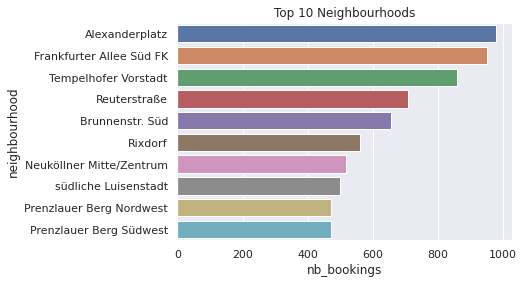

In [ ]:
sns.barplot(data=top_10_neighbourhoods, y='neighbourhood', x='nb_bookings').set_title('Top 10 Neighbourhoods');

How about the distribution of prices across neighbourhoods? Rather than looking at neighbourhoods, we will focus our attention on neighbourhood groups.

In [ ]:
listings_lt_500 = listings[listings.price <= 500]
fig_price = px.violin(
    listings_lt_500, 
    x="neighbourhood_group", 
    y="price", 
    color='neighbourhood_group'
)
fig_price.show(config={"displayModeBar": False})